In [29]:
import pandas as pd

In [30]:
df = pd.read_csv("Ecommerce data.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 497 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                497 non-null    object 
 3   Avg. Session Length   499 non-null    float64
 4   Time on App           498 non-null    float64
 5   Time on Website       499 non-null    float64
 6   Length of Membership  497 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


<h2>Data Cleaning</h2>

In [32]:
# check for null values
df.isnull().sum()

Email                   3
Address                 0
Avatar                  3
Avg. Session Length     1
Time on App             2
Time on Website         1
Length of Membership    3
Yearly Amount Spent     0
dtype: int64

In [33]:
# fill null values with the mean 
df['Avg. Session Length'] = df['Avg. Session Length'].fillna(df['Avg. Session Length'].mean())
df['Time on App'] = df['Time on App'].fillna(df['Time on App'].mean())
df['Time on Website'] = df['Time on Website'].fillna(df['Time on Website'].mean())
df['Length of Membership'] = df['Length of Membership'].fillna(df['Length of Membership'].mean())

In [34]:
df.isnull().sum()

Email                   3
Address                 0
Avatar                  3
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [35]:
df.describe().round(2)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.00,500.00,500.00,500.00,500.00
mean,33.05,12.05,37.06,3.53,499.31
std,0.99,0.99,1.01,1.00,79.31
min,29.53,8.51,33.91,0.27,256.67
25%,32.34,11.39,36.35,2.93,445.04
50%,33.08,12.00,37.07,3.53,498.89
75%,33.71,12.74,37.72,4.13,549.31
max,36.14,15.13,40.01,6.92,765.52


<h2>EDA</h2>

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10,5]

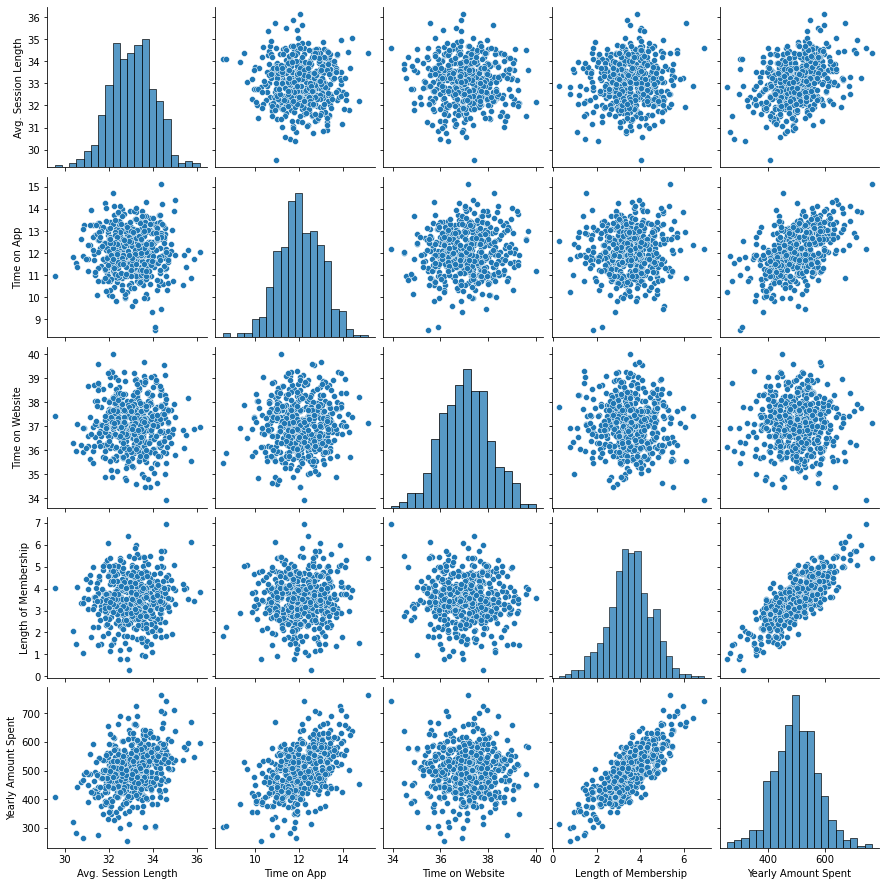

In [67]:
sns.pairplot(df)

<AxesSubplot:>

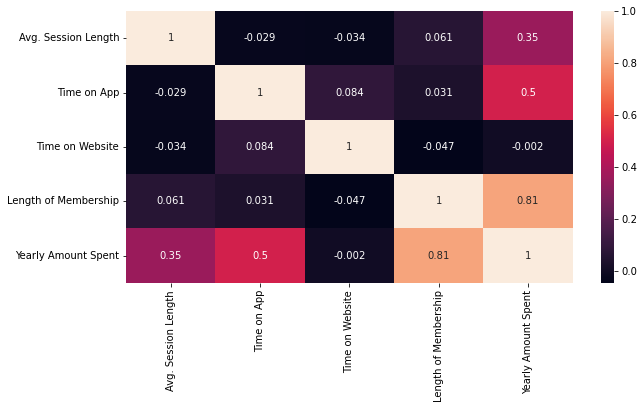

In [68]:
sns.heatmap(df.corr(), annot=True)

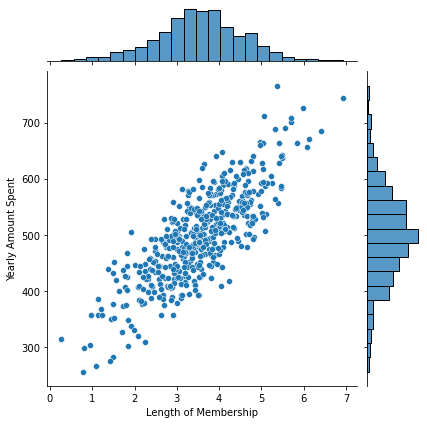

In [60]:
sns.jointplot(data=df, x='Length of Membership', y='Yearly Amount Spent')

<AxesSubplot:xlabel='Length of Membership', ylabel='Yearly Amount Spent'>

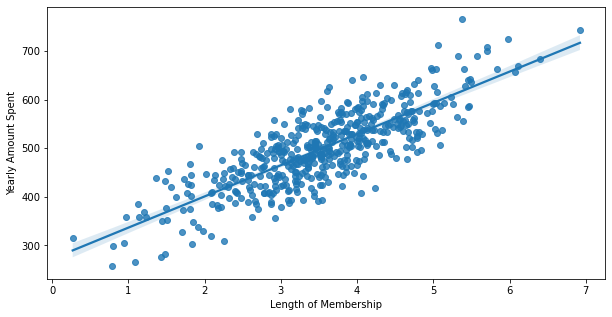

In [69]:
sns.regplot(data=df, x='Length of Membership', y='Yearly Amount Spent')

<AxesSubplot:xlabel='Time on App', ylabel='Yearly Amount Spent'>

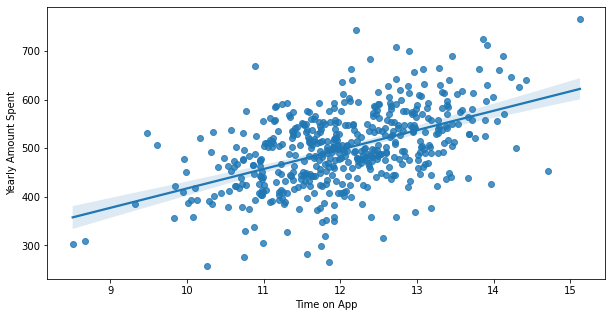

In [70]:
sns.regplot(data=df, x='Time on App', y='Yearly Amount Spent')

<AxesSubplot:xlabel='Time on Website', ylabel='Yearly Amount Spent'>

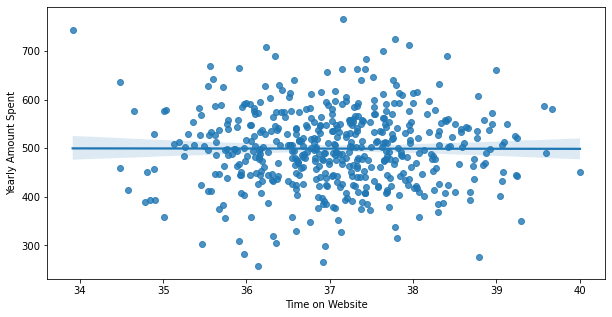

In [71]:
sns.regplot(data=df, x='Time on Website', y='Yearly Amount Spent')

<AxesSubplot:xlabel='Avg. Session Length', ylabel='Yearly Amount Spent'>

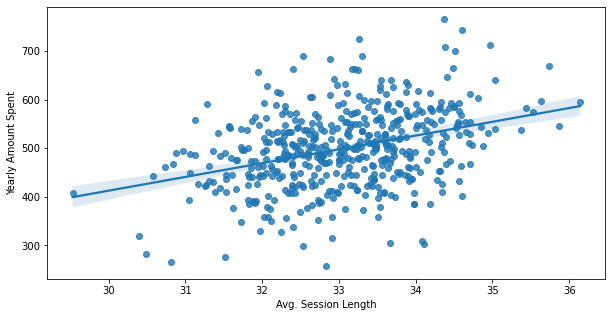

In [72]:
sns.regplot(data=df, x='Avg. Session Length', y='Yearly Amount Spent')

<h2>Data Splitting</h2>

In [76]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

<h2>Model Building and Training</h2>

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [46]:
model.fit(X_train, y_train)

LinearRegression()

<h2>Model Prediction</h2>

In [47]:
pred = model.predict(X_test)

<AxesSubplot:xlabel='Yearly Amount Spent'>

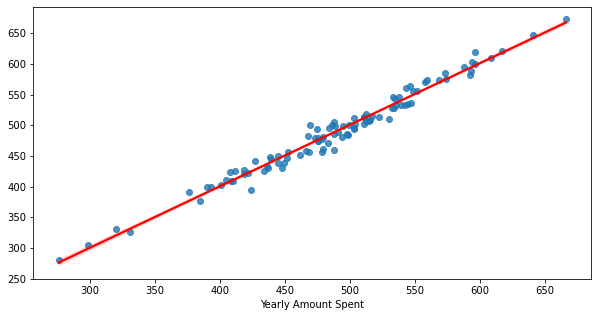

In [91]:
sns.regplot(data=df, x=y_test, y=pred, line_kws={"color": "red"})

<h2>Model Evaluation</h2>

In [48]:
model.score(X,y)

0.9828762142601541

In [49]:
import numpy as np
from sklearn import metrics
print('MAE: ' , metrics.mean_absolute_error(y_test, pred).round(2))
print('MSE: ' , metrics.mean_squared_error(y_test, pred).round(2))
print('RMSE: ' , np.sqrt(metrics.mean_squared_error(y_test, pred)).round(2))


MAE:  8.86
MSE:  119.31
RMSE:  10.92


In [50]:
model_coef = model.coef_.round(2)
model_coef

array([25.86, 38.82,  0.38, 61.79])

In [51]:
model_coef_df = pd.DataFrame(model_coef, X.columns, columns=['Coeff'])
model_coef_df

,Coeff
Avg. Session Length,25.86
Time on App,38.82
Time on Website,0.38
Length of Membership,61.79


<h2>Conclusion</h2>
Based on the model evaluation metrics the model performance is very good. And comparing the coeff results of the Time on App and the Time on Website, it clearly shows that the App will be more profitable than the Website. 

<h2>Recommendation</h2>It is recommended to invest more on the App rather than the Website.